# Semillero FICOMACO

Este código se estructura de la siguiente manera

* [1. Algebra vectorial](#section-1)
* [2. Ejemplo tiro parabólico](#section-2)
* [3. Ajuste de datos](#section-3)
* [4. Machine learning](#section-4)

In [2]:
# Importación de librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

## 1. Algebra vectorial <a class="anchor" id="section-1"></a>

### Constructores de vectores basicos

In [102]:
a = np.arange(0, 1, 0.1) # np.arange(valor inicial, valor final, paso)
print('a =',a,' shape =', a.shape)

b = np.linspace(0, 1, 6) # np.linspace(valor inicial, valor final, No. de datos)
print('b =',b,' shape =', b.shape)

c = np.array([5,6,7,8,9])
print('c =',c,' shape =', c.shape)

a = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]  shape = (10,)
b = [0.  0.2 0.4 0.6 0.8 1. ]  shape = (6,)
c = [5 6 7 8 9]  shape = (5,)


In [20]:
o = np.ones(10) #np.ones(No. datos)
print('o =',o)

z = np.zeros(8) #np.zeros(No. datos)
print('z =',z)

print('shape =', z.shape)
z2 = z.reshape(8,1) #np.reshape( filas, columnas )
print(''), print('z2 =',z2,' shape =',z2.shape)

z3 = z.reshape(4,2)
print(''), print('z3 =',z3,' shape =',z3.shape)

o = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
z = [0. 0. 0. 0. 0. 0. 0. 0.]
shape = (8,)

z2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]  shape = (8, 1)

z3 = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]  shape = (4, 2)


(None, None)

### Constructores de números aleatorios

In [47]:
# Distribucion normal, con promedio alrededor de 1
u=np.random.normal(size=6)

# Distribucion uniforme, con números entre 0 y 1
v=np.random.uniform(size=6)

# Números aleatorios enteros
w=np.random.randint(low=1, high=10, size=5)

print('u =',u), print('v =',v), print('w =',w)

u = [ 1.37971376  0.23024416 -1.64401574  1.10490927  0.4387865   0.20589173]
v = [0.30362794 0.06267476 0.93347205 0.38054266 0.54286877 0.46799086]
w = [9 6 5 6 4]


(None, None, None)

In [51]:
u1=np.random.normal(loc=5, scale=0.5, size=5) 
#loc= valor promedio, scale = desviacion estandar, size = No. datos

v1=np.random.uniform(low=1, high=8, size=4)
#low= valor minimo, high = valor maximo, size = No. de datos

print('u1 =',u1), print('v1 =',v1)

u1 = [5.02685656 4.8358309  4.90295835 4.24836797 4.80238442]
v1 = [3.75012213 5.08773051 3.45725491 6.19457036]


(None, None)

### Ejemplos de uso de linspace para hacer graficos

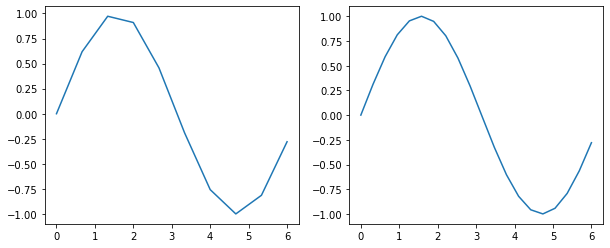

In [58]:
t1 = np.linspace(0,6,10) #contiene 10 datos
t2 = np.linspace(0,6,20) #contiene 20 datos

y1 = np.sin(t1)
y2 = np.sin(t2)

plt.figure(figsize=(10,4))
plt.subplot(121) #grafico 1
plt.plot(t1,y1)
plt.subplot(122) #grafico 2
plt.plot(t2,y2)

En `plt.subplot(121)`: 
* Los dos primeros digitos indican que los subplots se organizan en 1 fila, 2 columnas.
* El tercer digito dice que el índice del grafico es 1

### Meshgrid

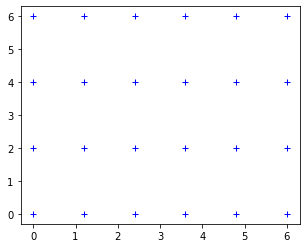

Dimensión de X =  (4, 6)
Dimensión de Y =  (4, 6)


In [92]:
a = np.linspace(0,6,6)
b = np.linspace(0,6,4)

X, Y = np.meshgrid(a,b)

plt.figure(figsize=(5,4))
plt.plot(X,Y,'+b')
plt.show()

print('Dimensión de X = ', X.shape)
print('Dimensión de Y = ', Y.shape)

X, Y son matrices con las coordenadas de los puntos sobre el plano!

### Ejemplo de uso de meshgrid para hacer graficas

In [94]:
#muestra las graficas en una subventana nueva
%matplotlib auto 

Using matplotlib backend: Qt5Agg


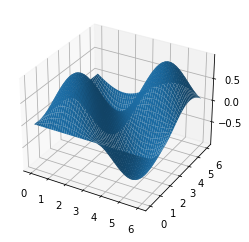

In [85]:
t3 = np.linspace(0,6,50)
t4 = np.linspace(0,6,50)

X,Y = np.meshgrid(t3, t4)
Z = np.sin(X)*np.sin(Y)

plt.figure(figsize=(5,4))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

Con meshgrid, ahora podemos graficar funciones de dos variables!

In [96]:
#muestra las graficas dentro de jupyter
%matplotlib inline 

### Matrices

In [147]:
A = np.zeros((4,5))
print('A =\n', A)

I = np.identity(5)
print('\nI =\n',I)

B = np.ones((4,5))
print('\nB =\n', B)

C = np.array([[3,4,5],[2,1,0],[7,0,9]])
print('\nC =\n', C)

J = np.random.normal(size=(3,4))
print('\nE =\n', J)

A =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

I =
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

B =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

C =
 [[3 4 5]
 [2 1 0]
 [7 0 9]]

E =
 [[ 0.3077357  -1.37248633  0.74378292  0.39936935]
 [ 1.0146325  -0.49134002 -0.15215712  0.09798356]
 [-0.69743563 -0.41221773 -2.08012759 -0.37886176]]


In [133]:
d = np.diag(C) #extrae la diagonal principal de C
print('d = ',d)

a1 = C[:,2] #toma todos los elementos de la columna 3
print('a1 = ',a1)

b1 = C[1,:] #toma todos los elementos de la fila 2
print('b1 = ',b1)

c1 = C[0:2,2] #toma los elementos con indices mayores o iguales que 0 y menores que 2, de la columna 2
print('c1 = ',c1)

d =  [3 1 9]
a1 =  [5 0 9]
b1 =  [2 1 0]
c1 =  [5 0]


In [122]:
v = np.array([3,1,9]) #vector para la diagonal

D1 = np.diag(v) #crea una matriz de ceros con v en la diagonal principal
print('D1 =\n',D1)

D2 = np.diag(v, k=1) #crea una matriz de ceros con v en la diagonal 1 arriba de la principal
print('\nD2 =\n',D2)

D3 = np.diag(v, k=-1) #crea una matriz de ceros con v en la diagonal 1 por debajo de la principal
print('\nD3 =\n',D3)

D1 =
 [[3 0 0]
 [0 1 0]
 [0 0 9]]

D2 =
 [[0 3 0 0]
 [0 0 1 0]
 [0 0 0 9]
 [0 0 0 0]]

D3 =
 [[0 0 0 0]
 [3 0 0 0]
 [0 1 0 0]
 [0 0 9 0]]


### Operaciones basicas

In [146]:
s = np.array([1,2,3])
t = np.array([3,4,5])

print('a =',s+t)           #suma componente a componente 
print('b =', s*t)          #producto componente a componente 
print('c = ', np.dot(s,t)) #producto punto
print('d = ', 2*s+1)     

a = [4 6 8]
b = [ 3  8 15]
c =  26
d =  [3 5 7]


In [161]:
M = np.random.randint(low=1, high=10, size=(4,4))
N = np.random.randint(low=1, high=10, size=(4,4))

print('M =\n',M)
print('\nA =',M+N)
print('\nB =',M*N)
print('\nC =',np.dot(M,N))
print('\ntraza(M) =',np.trace(M))
print('\ndet(M) = ',np.linalg.det(M))

M =
 [[1 6 8 8]
 [5 7 2 1]
 [4 6 2 9]
 [8 9 9 7]]

A = [[ 3 13 11 14]
 [ 9  9  3  8]
 [ 8 15  9 16]
 [14 18 10  8]]

B = [[ 2 42 24 48]
 [20 14  2  7]
 [16 54 14 63]
 [48 81  9  7]]

C = [[106 163  73 112]
 [ 52  76  37  94]
 [ 94 139  41  89]
 [130 218 103 181]]

traza(M) = 17

det(M) =  1687.0


In [163]:
b = np.array([1,4,5,6])
sol = np.linalg.solve(M,b) #Soluciona el SEL M.x=b para x
e, v = np.linalg.eig(M) #Valores propios de M: M.v = e*v

print('sol = ', sol) #vector o vectores de solución
print('\ne =\n',e) #valores propios
print('\nv =\n',v) #vectores propios

sol =  [ 0.75103734  0.0746888  -0.25311203  0.22821577]

e =
 [22.60335276+0.j          3.38333736+0.j         -4.49334506+1.36726504j
 -4.49334506-1.36726504j]

v =
 [[ 0.49867889+0.j         -0.36870812+0.j          0.66810869+0.j
   0.66810869-0.j        ]
 [ 0.26356345+0.j          0.78392822+0.j         -0.23703702-0.09214465j
  -0.23703702+0.09214465j]
 [ 0.47010962+0.j         -0.29387266+0.j         -0.20921784+0.55166412j
  -0.20921784-0.55166412j]
 [ 0.67885979+0.j         -0.40391798+0.j         -0.07177334-0.36837043j
  -0.07177334+0.36837043j]]


In [171]:
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [172]:
M.ravel()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## 2. Ejemplo tiro parabólico <a class="anchor" id="section-2"></a>

Una forma de graficar vectores es usando el comando `plt.quiver`

In [233]:
# Declaración de los vectores a graficar
v = np.array([1,2])
w = np.array([3,4])

o = np.zeros(2) # Vector de la posición inicial de los vectores

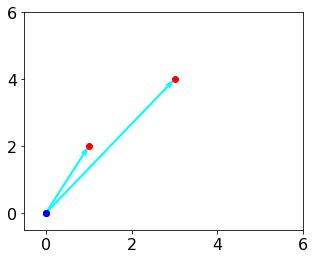

In [234]:
# X,Y contienen la posición inicial de los vectores
# U,V contienen las componentes en x, y de los vectores respectivamente

X = o
Y = o
U = np.array([v[0],w[0]])
V = np.array([v[1],w[1]])

plt.figure(figsize=(5,4))

# Graficamos los vectore
plt.quiver(X,Y,U,V,color='cyan',angles='xy', scale_units='xy', scale=1)
#angles, scale_units, scale: hacen que los vectores se grafiquen de forma normal, sin alterar
#su tamaño o dirección.

# Graficamos puntos
plt.plot(o,o,'ob') #puntos iniciales
plt.plot(o+U,o+V,'or') #puntos finales

# Ajustamos los límites del plot para poder ver los vectores
plt.xlim(-0.5,6)
plt.ylim(-0.5,6)

plt.show()

A continuación se muestra el ejemplo:

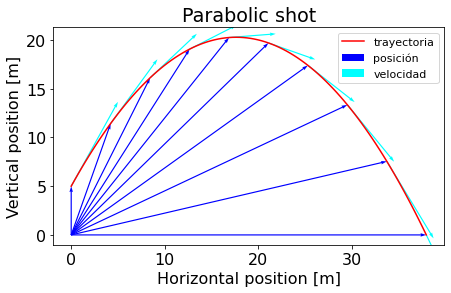

In [238]:
# valores iniciales (modifícalos bajo tu responsabilidad)
v0 = 20 ## v en m/s
y0=5
x0=0
alfa = 60 ## ángulo en grados
g = 9.81 ## Aceleración de la gravedad

## ecuaciones
v0x = v0 * np.cos(np.deg2rad(alfa))
v0y = v0 * np.sin(np.deg2rad(alfa))
t_total = (-v0y-np.sqrt((v0y**2)+2*g*y0))/(-g)

## graficando trayectoria
t=np.linspace(0,t_total,100)
x=v0x*t + x0
y=(-g*(t**2))/2 + v0y*t + y0
vx=v0x
vy=v0y-g*t
plt.figure(figsize=(7,4))
plt.plot(x,y,color='red', label='trayectoria')

## graficando vectores
n=10 #No. de vectores
t=np.linspace(0,t_total,n)
x1=v0x*t + x0
y1=(-g*(t**2))/2 + v0y*t + y0
vx1=np.zeros(n)+v0x
vy1=v0y-g*t

X = np.zeros(n) #situamos el origen de los vectores posición en el origen
Y = np.zeros(n)
U = x1 #puntos de la trayectoria en x
V = y1 #puntos de la trayectoria en y

## Titulos, labels, tamaño de letra
plt.title('Parabolic shot')
plt.xlabel(R'Horizontal position [m]')
plt.ylabel(R'Vertical position [m]')
plt.rc('font',size=16)

## Uso de quiver para graficar los vectores
plt.quiver(X, Y, U, V, scale_units='xy',angles='xy',scale=1, color='blue',width=0.003, label='posición')
plt.quiver(U, V, vx1, vy1, scale_units='xy',angles='xy',scale=2, color='cyan',width=0.003, label='velocidad')

#scale: ajusta el tamaño de los vectores en pantalla

## Mostramos la leyenda
plt.legend(fontsize=11)
plt.show()

## 3. Ajuste de datos <a class="anchor" id="section-3"></a>

### Lectura de datos

Para la lectura de datos se usará el comando:

In [244]:
M=np.loadtxt('presion_temp.txt', delimiter=' ', comments='#',skiprows=1,unpack=True, usecols=(0,3))

Este comando tiene las siguientes entradas:
 * `filename`: nombre del archivo
 * `delimiter=' '`: delimitador de los datos del archivo
 * `coments='#'`: hace que las líneas que empiecen con '#' sean ignoradas
 * `skiprows=1`: hace que el comando se salte 1 linea, empezando a leer desde la siguiente
 * `unpack=True`: traspone los datos del archivo por eficiencia
 * `usecols=(0,3)`: hace que el comando solamente lea las columnas 0 y 3

In [243]:
print('datos =\n', M)

datos =
 [[0.000e+00 2.000e+02 4.000e+02 6.000e+02 8.000e+02 1.000e+03 1.200e+03
  1.400e+03 1.600e+03 1.800e+03 2.000e+03 2.200e+03 2.400e+03 2.600e+03
  2.800e+03 3.000e+03 3.200e+03 3.400e+03 3.600e+03 3.800e+03 4.000e+03
  4.200e+03 4.400e+03 4.600e+03 4.800e+03 5.000e+03 5.200e+03 5.400e+03
  5.600e+03 5.800e+03 6.000e+03 6.200e+03 6.400e+03 6.600e+03 6.800e+03
  7.000e+03 8.000e+03 9.000e+03 1.000e+04 1.200e+04 1.400e+04 1.600e+04
  1.800e+04]
 [9.807e+00 9.806e+00 9.805e+00 9.805e+00 9.804e+00 9.804e+00 9.803e+00
  9.802e+00 9.802e+00 9.801e+00 9.800e+00 9.800e+00 9.799e+00 9.799e+00
  9.798e+00 9.797e+00 9.797e+00 9.796e+00 9.796e+00 9.795e+00 9.794e+00
  9.794e+00 9.793e+00 9.793e+00 9.792e+00 9.791e+00 9.791e+00 9.790e+00
  9.789e+00 9.785e+00 9.788e+00 9.788e+00 9.787e+00 9.786e+00 9.785e+00
  9.785e+00 9.782e+00 9.779e+00 9.776e+00 9.770e+00 9.764e+00 9.758e+00
  9.751e+00]]


Observe que M contiene dos vectores, donde el primero corresponde a los datos de altura, y el segundo, a los datos de gravedad.

In [245]:
# ALmacenamos los datos de altura y gravedad
h=M[0]
g=M[1]

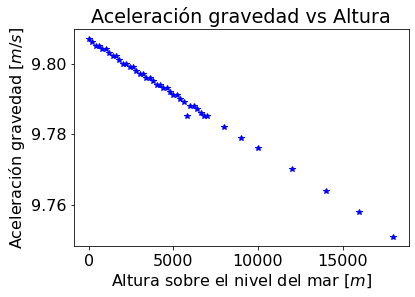

In [271]:
plt.figure(figsize=(6,4))
plt.plot(h,g,'b*')
plt.title('Aceleración gravedad vs Altura')
plt.xlabel(R'Altura sobre el nivel del mar [$m$]')
plt.ylabel(R'Aceleración gravedad [$m/s$]')
plt.show()

\
Defininmos una función de ajuste para la gravedad como:

$$g = \frac{G.m_T}{r^2}$$
Donde:
* $g$ es el valor de la gravedad
* $G$ es la cte. gravitacional
* $r$ es la distancia desde el centro de la tierra hasta un punto
* $m_T$ es la masa de la Tierra

In [258]:
def gravedad(H, a, R):
    return a/((R+H)**2)

#H es la altura sobre el nivel del mar
#R y a son constantes que se desean hallar: 
#R: radio de la Tierra
#a: es igual a G*mT

In [274]:
best_val, covar = curve_fit(gravedad, h, g) #curve_fit(funcion, datos de entrada, datos de salida)

#best_val: mejores parametros de ajuste encontrados
#covar: matriz de covarianza

Gmt = best_val[0]
R = best_val[1]
print('G*mt=', Gmt, 'R=', R, 'Desviación estandar=', np.sqrt(np.diag(covar)))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [260]:
# Valores conocidos

G = 6.67 * (10**-11) #cte. de gravitación
mT = 6 * (10**24) #masa de la tierra
rT = 6.4*(10**6) #radio de la tierra

\
Podemos asignarle estos valores conocidos al comando `curve_fit` para que los tome en cuenta al momento de hacer el ajuste.

In [281]:
par_inicial = [G*mT, rT]

best_val,covar=curve_fit(gravedad, h, g, p0 = par_inicial)

#best_val: mejores parametros de ajuste encontrados
#covar: matriz de covarianza

GmT=best_val[0]
R=best_val[1]

print('\nG.mT =', Gmt,'[N.m^2]', '\n\nR =', R, '[m]')

var = np.sqrt(np.diag(covar))
print('\nDesviación estándar G.mT=', var[0],'[N.m^2]')
print('\nDesviación estándar R=', var[1],'[m]')


G.mT = 397147331996641.8 [N.m^2] 

R = 6363813.241360652 [m]

Desviación estándar G.mT= 6468223376167.94 [N.m^2]

Desviación estándar R= 51863.01270582741 [m]


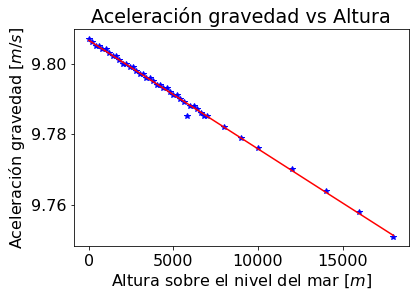

In [273]:
ht=np.linspace(h[0],h[-1], 1000)
plt.figure(figsize=(6,4))
plt.plot(h,g,'b*')
plt.plot(ht,fun(ht, GmT, R), 'r-')
plt.title('Aceleración gravedad vs Altura')
plt.xlabel(R'Altura sobre el nivel del mar [$m$]')
plt.ylabel(R'Aceleración gravedad [$m/s$]')
plt.show()

## 3. Machine learning <a class="anchor" id="section-4"></a>

Se declara una clase, llamada perceptron, para los comandos de machine learning

In [282]:
class Perceptron(object):
    
    def __init__(self, eta=0.1, n_iter=8):
        # in the class initializer we set the learning rate(eta) 
        # and number of iterations to run(n_iter)
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # pass in the X and y to fit our new perceptron model
        # initiate our numpy array of weights and array of errors
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        # train our model by looping n_iter times
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                # for each individual X and y data pair, update the
                # update our model weights via learning rate * prediction error
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

        # return our model after it has passed n_iter times through our training dataset
        return self
    
    def net_input(self, X):
        # helper function for predict function
        # to get the value for weights * x + weight_0
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        # predict on unseen data with our trained model
        return np.where(self.net_input(X) >= 0.0, 1, -1)

\
Leemos y mostramos una parte del conjunto de datos:

In [286]:
print(50 * '=')
print('Section: Training a perceptron model on the Iris dataset')
print(50 * '-')

filename ="iris.data"
df = pd.read_csv(filename, header=None)
print(df.tail())

Section: Training a perceptron model on the Iris dataset
--------------------------------------------------
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


Mostramos el conjunto de datos de setosa y versicolor en una imagen

Plotting the Iris data
--------------------------------------------------


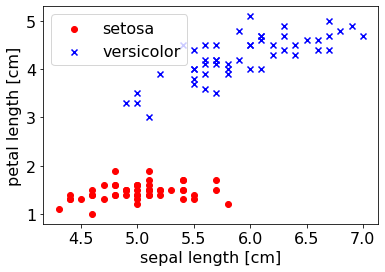

In [288]:
print(50 * '=')
print('Plotting the Iris data')
print(50 * '-')

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[0:50, 0], X[0:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.tight_layout()
# plt.savefig('./images/02_06.png', dpi=300)
plt.show()

\
Realizamos el entrenamiento de datos, para obtener una predicción.

In [291]:
print(50 * '=')
print('Training the perceptron model')
print(50 * '-')

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(eta=1, n_iter=10)
ppn.fit(X, y)

Training the perceptron model
--------------------------------------------------


\
Graficamos los errores que hubieron en cada iteracción

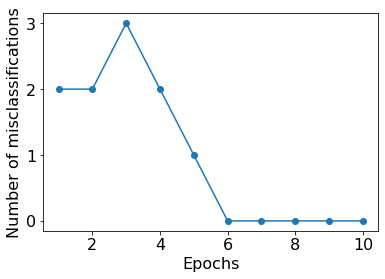

In [290]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

# plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

\
Mostramos la predicción realizada

A function for plotting decision regions
--------------------------------------------------


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


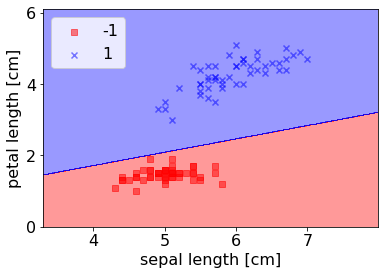

In [292]:
print(50 * '=')
print('A function for plotting decision regions')
print(50 * '-')


def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.5, c=cmap(idx),
                    marker=markers[idx], label=cl)


plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()